# DryBeans - Feijões Secos

DataSet extraído do Kaggle

## Informações relevantes:

Sete tipos diferentes de grãos secos de feijão foram utilizados nesta pesquisa, levando em consideração as características como forma, formato, tipo e estrutura pela situação do mercado. 

Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijões secos com características semelhantes, a fim de obter uma classificação uniforme das sementes. Para o modelo de classificação, imagens de 13.611 grãos de 7 feijões diferentes registrados foram obtidas com uma câmera de alta resolução. As imagens de feijão obtidas pelo sistema de visão computacional foram submetidas às etapas de segmentação e extração de características, totalizando 16 características; 12 dimensões e 4 formas de forma, foram obtidas a partir dos grãos.

Informações do atributo:
- 1.) Área (A): A área de uma zona de feijão e o número de pixels dentro de seus limites.

- 2.) Perímetro (P): A circunferência do feijão é definida como o comprimento de sua borda.

- 3.) Comprimento do eixo principal (L): A distância entre as extremidades da linha mais longa que pode ser traçada a partir de um feijão.

- 4.) Comprimento do eixo menor (l): A linha mais longa que pode ser traçada a partir do feijão estando perpendicular ao eixo principal.

- 5.) Proporção (K): Define a relação entre L e l.

- 6.) Excentricidade (Ec): Excentricidade da elipse tendo os mesmos momentos que a região.

- 7.) Área convexa (C): Número de pixels no menor polígono convexo que pode conter a área de uma semente de feijão.

- 8.) Diâmetro equivalente (Ed): O diâmetro de um círculo com a mesma área que a área de uma semente de feijão.

- 9.) Extensão (Ex): A proporção dos pixels na caixa delimitadora para a área do feijão.

- 10.) Solidez (S): Também conhecida como convexidade. A proporção dos pixels na casca convexa para aqueles encontrados nos grãos.

- 11.) Arredondamento (R): Calculado com a seguinte fórmula: (4piA)/(P^2)

- 12.)Compactness (CO): Mede a redondeza de um objeto: Ed/L

- 13.)Fator de Forma 1 (SF1)

- 14.)Fator de Forma2 (SF2)

- 15.) Fator de Forma 3 (SF3)

- 16.) Fator de Forma 4 (SF4)

- 17.)Classe (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz e Sira)

Vamos deletar a coluna de classes para que possamos realizar a clusterização e depois usaremos para matéria de comparação e acuracidade de nosso modelo. Usaremos também n = 7, ou seja, criaremos os 7 clusters para os 7 tipos de feijão.

Seguiremos da seguinte maneira o projeto:

1. Imports necessários
2. Análises estatísticas iniciais e se necessário tratamento dos dados
3. Análise exploratória e criação de hipóteses sobre o modelo
4. Implementação do modelo
5. Validação do modelo e análise de resultados
6. Conclusão



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importando as bibliotécas que utilizaremos
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from math import pi
import numpy as np

In [4]:
# Data Frame que utilizaremos
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
print(df['Class'].value_counts().count())
df['Class'].value_counts()

7


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

O import deu certo e podemos ver que temos 7 classes: nosso k vai ser igual a 7, portanto.

Ao invés de deletar essa coluna, vamos apenas excluí-la das análises e do modelo.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Todas as variáveis são numéricas e portanto não precisaremos converter nada para numérico.

In [7]:
df.isnull().count()

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64

Sem dados faltantes.

In [8]:
df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea']].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000


Vamos separar as análises do describe para não ficar muito longo:

- Area:
    - Tem valores altos, mas o mínimo e o máximo fazem sentido. Não tem valores zero.
- Perímetro:
    - O mínimo e o máximo são razoáveis, sem valores faltantes ou zerados também.
- MajorAxisLength e MinorAxisLenght:
    - Máximo e mínimo razoáveis
- AspectRation, Eccentricity e ConvexArea:
    - Apesar de terem ordem de grandeza diferente entre si, as três colunas têm máximos e mínimos razoáveis, não tem valores nulos nem faltantes.

Perfeito, vamos ver o resto:

In [9]:
df[['EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']].describe()

,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


- EquivDiameter, Extent e Solidity:
    - Tem ordens de grandeza divergente, mas máximos e mínimos bem definidos e em intervalos razoáveis, sem dados faltantes ou zerados.
- roundness e Compactness:
    - Têm a mesma ordem de grandeza e máximos e mínimos bem definidos e em intervalos razoáveis, sem dados faltantes ou zerados.
- ShapeFactor1, 2,3 e 4:
    - São valores muito parecidos e possívelmente tem uma altíssima correlação entre si. Sem problemas também
    

Com o dataset validado e verificado e sem apresentar problemas nos dados e em seus tipos, podemos seguir para a análise exploratória.

Vamos começar observando a dispersão dos dados frente a variável Area:

In [10]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

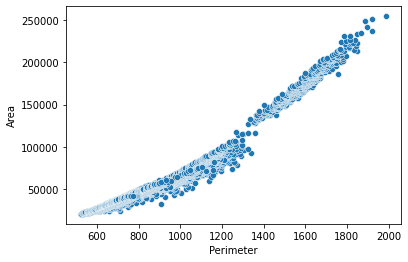

In [11]:
sns.scatterplot(data=df, x="Perimeter", y="Area")

Faz bastante sentido que conforme se aumente a área, se aumente o perímetro também.

Realmente, como a fórmula da Área depende do perímetro, feijões maiores tem maior área e perímetro.

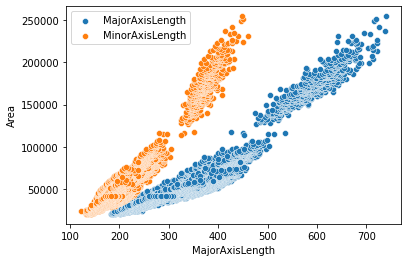

In [12]:
sns.scatterplot(data=df, x="MajorAxisLength", y="Area", label='MajorAxisLength')
sns.scatterplot(data=df, x="MinorAxisLength", y="Area", label='MinorAxisLength')

Tanto o MajorAxisLenght quanto o MinorAxislength são diretamente proporcionais a Area também, ou seja, quando a Área aumenta, essas variáveis aumentam também.

Como é visível no gráfico e vimos com o describe(), o MajorAxisLenght atinge valores maiores (tem um intervalo que vai de um mínimo maior até um máximo maior que o MinorAxisLenght). Faz total sentido, vejamos um elipse abaixo em que temos um eixo principal (na horizontal, que vai de uma extremidade a outra) e o secundário, perpendicular ao principal e na vertical (de cima para baixo):


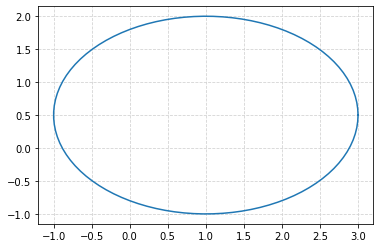

In [13]:
u=1.     
v=0.5    
a=2.     
b=1.5   

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()


Fica claro que conforme o feijão aumenta de tamanho, é de se esperar que aumente em comprimento e largura e portanto essas variáveis andem junto com a área e com o perímetro.

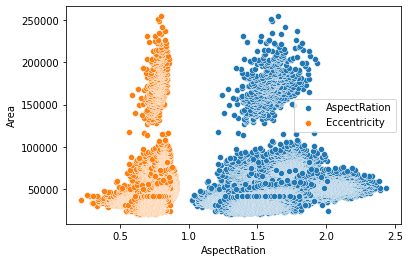

In [14]:
sns.scatterplot(data=df, x="AspectRation", y="Area", label='AspectRation')
sns.scatterplot(data=df, x="Eccentricity", y="Area", label='Eccentricity')


A variável AspectRation, proporção do grão, não parece ter uma relação muito clara com a Area. Ou seja, não existe evidência estatística que prove que grãos maiores ou menores são mais ou mneos proporcionais.

Existe uma parcela dos dados que se limita a uma Area de até ~100000 e uma segunda parcela que vai de ~125000 até ~250000. Valores fora desses ranges são mais raros e praticamente não existem.

A variável Eccentricity se comporta de maneira parecida e os intervalos em que ela pode ocorrer frente a Area são quase os mesmos também. É provável que exista uma relação entre essas variáveis também. A ver:

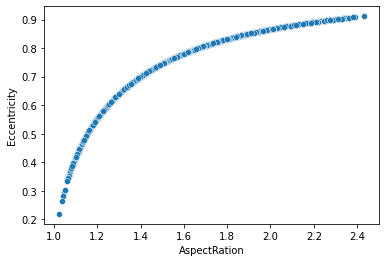

In [15]:
sns.scatterplot(data=df, x="AspectRation", y="Eccentricity")

Interessante, conforme aumentamos a variável AspectRation, proporção,  aumentamos o Eccentricty (Excentricidade da elipse tendo os mesmos momentos que a região), mas aparentemente esse valor tende a um valor fixo e se estabilizar. Ou seja, a partir desse valor, não importa o quanto aumente a variável AspectRation, a variável Eccentricity vai se manter constante.

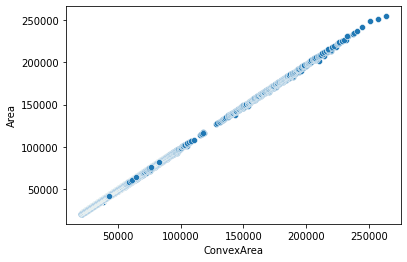

In [16]:
sns.scatterplot(data=df, x="ConvexArea", y="Area")


A variável ConvexArea é diretamente proporcional a Area, faz sentido parece. Conforme aumentamos a Area, aumentamos e ConvexArea e vice versa.



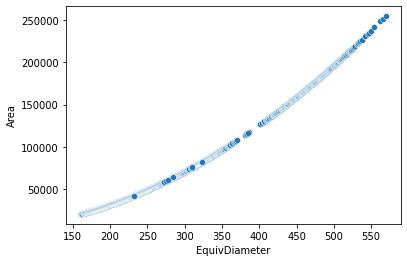

In [17]:
sns.scatterplot(data=df, x="EquivDiameter", y="Area")

O comportamento da variável EquivDiameter é similar aos outros: conforme a Area aumenta, essa variável aumenta também.



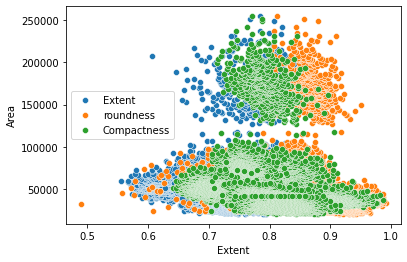

In [18]:
sns.scatterplot(data=df, x="Extent", y="Area",  label='Extent')
sns.scatterplot(data=df, x="roundness", y="Area",  label='roundness')
sns.scatterplot(data=df, x="Compactness", y="Area", label='Compactness')

Aqui não existe uma relação linear, mas podemos ver que como em outros casos, existem basicamente 2 intervalos de valores que as variáveis Extent, Roundness e Compactness podem assumir: de 0 a ~100000 e de ~125000 a ~250000.

Lembrando:
- Extensão: A proporção dos pixels na caixa delimitadora para a área do feijão.

- Arredondamento (R): Calculado com a seguinte fórmula: (4piA)/(P^2)

- Compactness (CO): Mede a redondeza de um objeto, quão redondo é o grão.

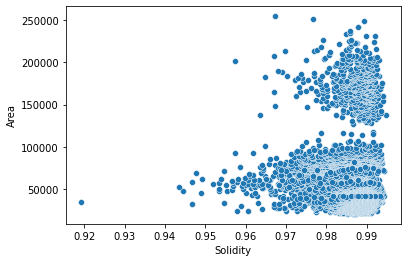

In [19]:
sns.scatterplot(data=df, x="Solidity", y="Area")

O mesmo se repete com Solidity, frente a Area essa variável pode assumir dois intervalos de valores em quase todos os casos.

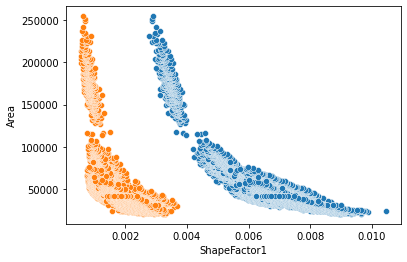

In [20]:
sns.scatterplot(data=df, x="ShapeFactor1", y="Area")
sns.scatterplot(data=df, x="ShapeFactor2", y="Area")


As variáveis de formato (shapefactor) não se conversam entre si. As 1 e 2 são inversamente proporcionais a Area e conforme aumentamos a Area elas tendem a um valor constante baixo e conforme a Area diminui elas também tendem a um valor constante, em uma crescente.

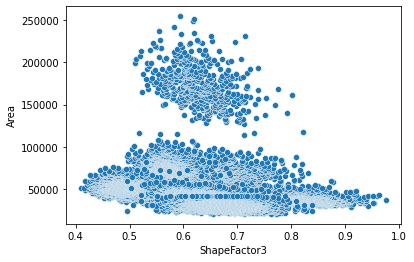

In [21]:
sns.scatterplot(data=df, x="ShapeFactor3", y="Area")

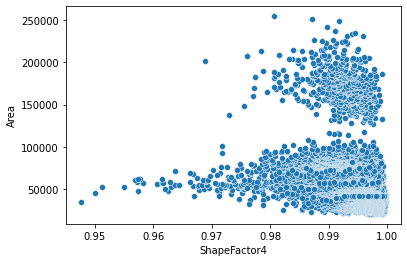

In [22]:
sns.scatterplot(data=df, x="ShapeFactor4", y="Area")


O fator 3 e 4 seguem o comportamento que vem se repetindo até aqui dos dois intervalos de valores, ainda que se levantem algumas questões:

- Qual a relação entre proporção do grão e sua solidez? Grãos mais proporcionais tendem a ser mais sólidos? 

- O perímetro afeta no arredondamento? Ou seja, grãos maiores tendem a ser mais arredondados?

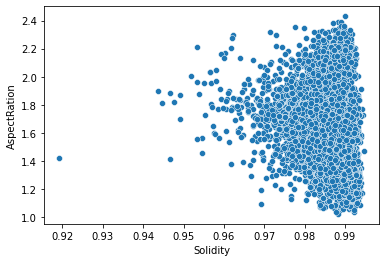

In [23]:
sns.scatterplot(data=df, x="Solidity", y="AspectRation")

Aparentemente não existe uma relação. O que podemos observar é que a variável de solidez assume a maioria dos valores > ~0.96 e, independentemente de seu valor, pode assumir qualquer proporção.

Vamos investigar a variável de solidez:

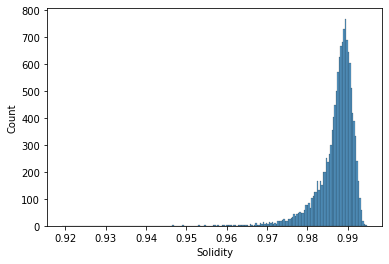

In [24]:
sns.histplot(data=df, x="Solidity")

De fato, essa variável respeita uma curva normal e fica visível que o feijão com solidez =~0.92 é um outlier e deve estar a mais de 3 desvios padrões de 'distância' do valor de maior ocorrência.

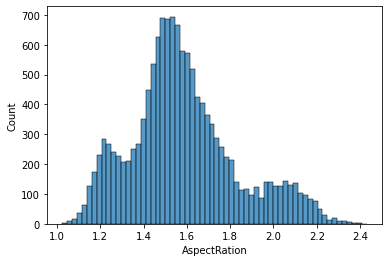

In [25]:
sns.histplot(data=df, x="AspectRation")

A variável de proporção em compensação, apesar de também seguir uma normal, tem seus valores mais próximos na média do valor de maior ocorrência. Não parece haver outliers.

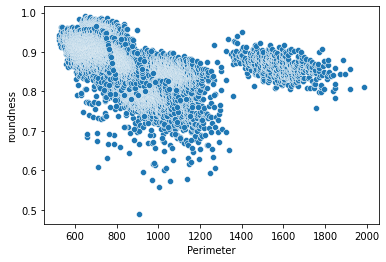

In [26]:
sns.scatterplot(data=df, x="Perimeter", y="roundness")

Não parece haver uma relação clara também entre o perímetro e o arredondamento do feijão. Vamos ver o comportamento de cada uma:

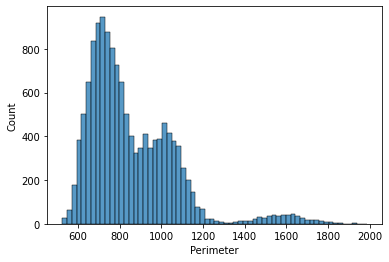

In [27]:
sns.histplot(data=df, x="Perimeter")

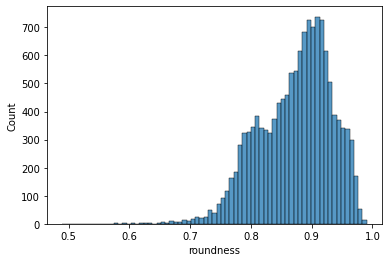

In [28]:
sns.histplot(data=df, x="roundness")

As duas seguem uma distribuição normal também, mas realmente não há relação clara entre essas variáveis.

Vamos avaliar todas as possíveis relações:

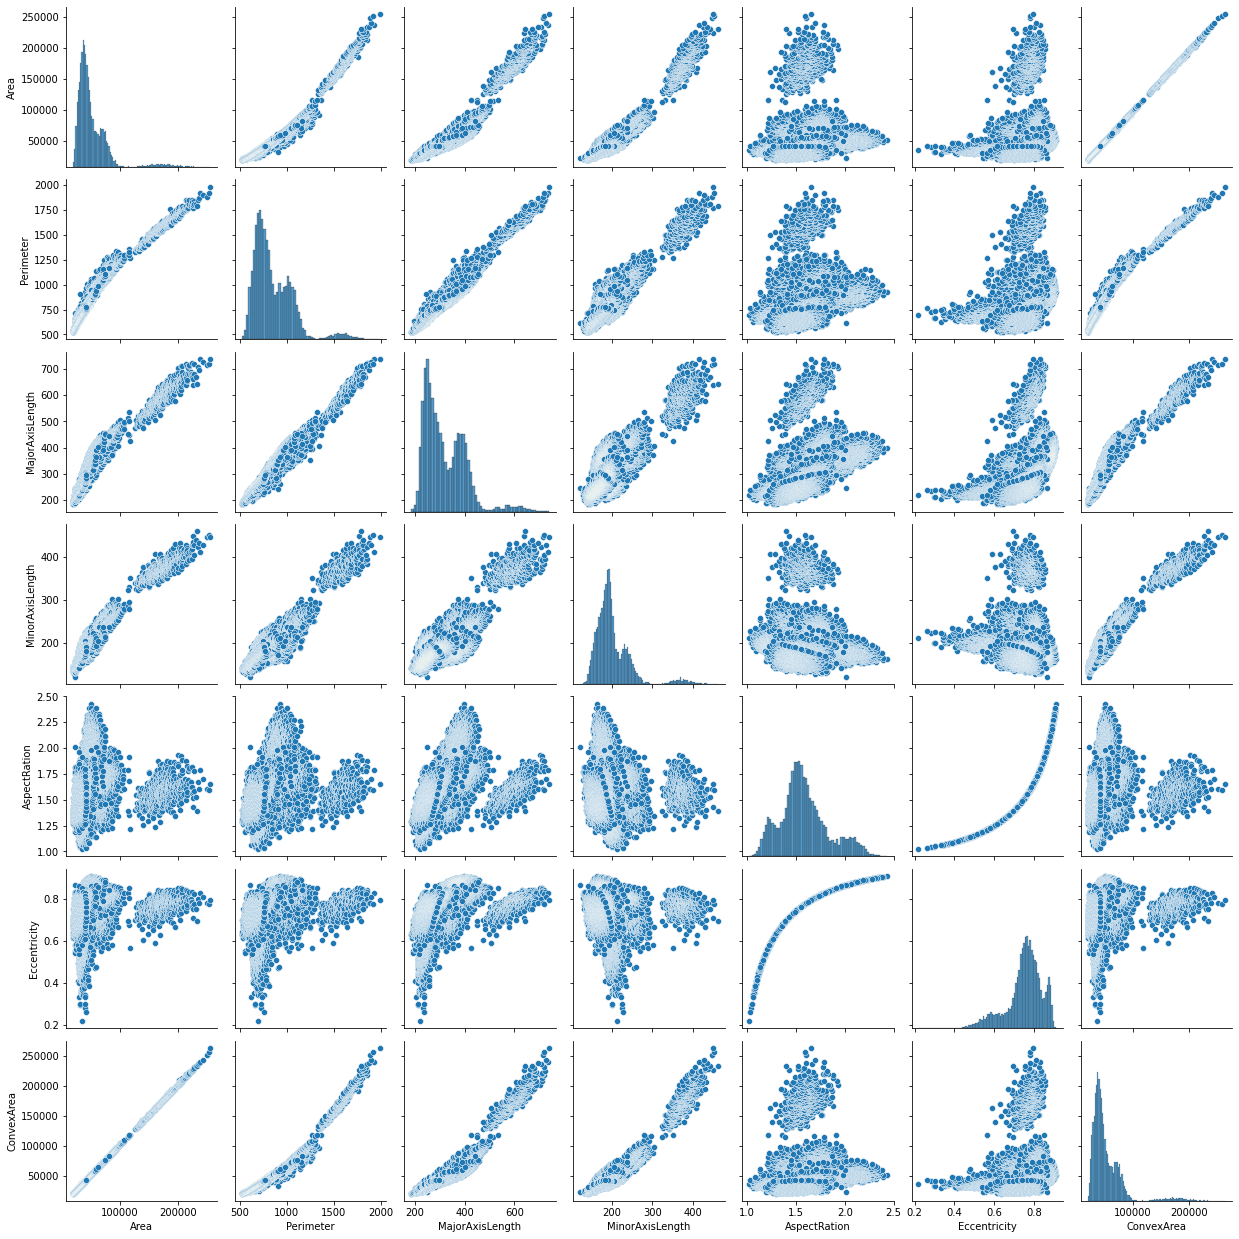

In [29]:
sns.pairplot(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea']])

O que podemos observar nessa seção: 

A maioria das variáveis, quando colocadas em gráficos de dispersão, ou tem um comportamento linear ou aleatório (respeitando certos intervalos). Suas distribuições são, em todos os casos, normais.

Como exemplo vamos observar a variável ConvexArea: ela aumenta conforme aumentamos a Area, o Perímetro, o eixos horizontal e vertical, porque de fato, essa variável tem relação direta com o tamanho do grão, tudo fazendo sentido. No mais, ela apresenta um comportamento aleatório, ainda que tendo basicamente dois intervalos em que pode ocorrer, para as variáveis de proporção e excentricidade.

Essa variável segue uma normal também com bastante valores até ocorrendo a mais de um desvio padrão.

Vamos observar as outras e escolher uma variável para avaliá-la também:

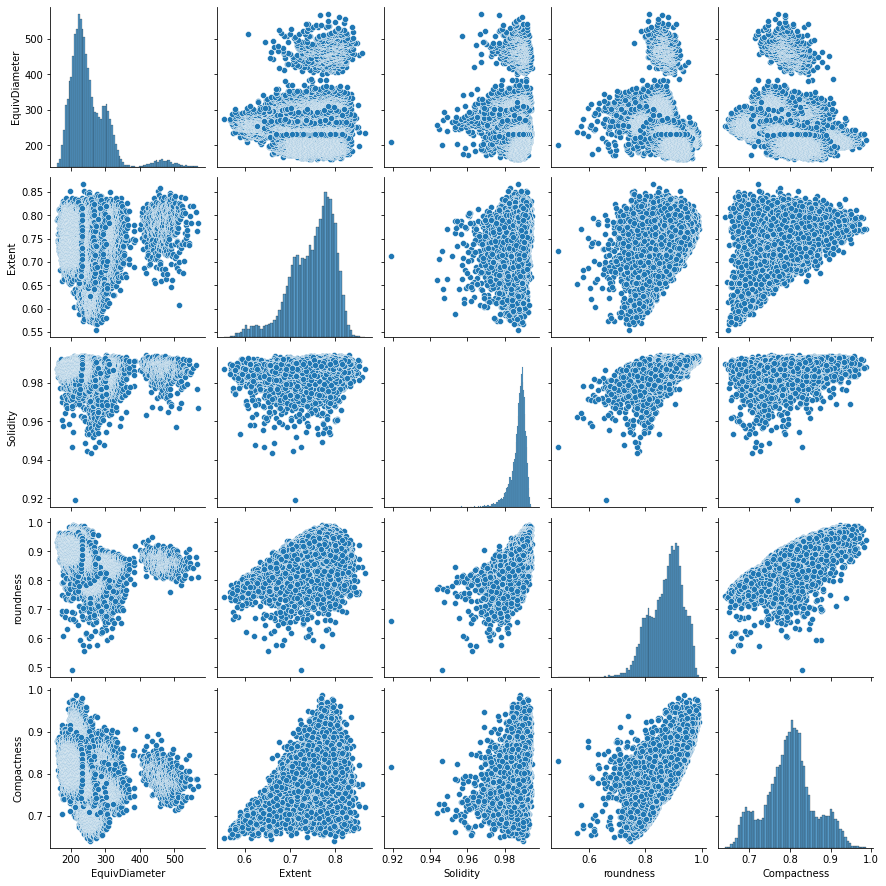

In [30]:
sns.pairplot(df[['EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness']])

Vejamos a variável Compactness:

Ela apresenta um comportamento sem relação direta com a variável EquivDiameter, apesar de também respeitar alguns intervalos de ocorrência.

Com a variável Extent, parece formar um triângulo e isso mostra que há mais ocorrências para quando a variável Compactness tem valores baixos e esses podem assumir valores de Extent de ~0.6 a ~0.8. Conforme o valor de Compactness aumenta, seu range diminui. Por exemplo, valores de Compactness acima de 0.9 podem assumir valor de Extend entre ~0.7 e ~0.8.

Para Solidity, não há muito uma regra a não ser o fato de que essa variável não costuma assumir valores menores que ~0.94.

Com relação a Roundness, parece haver uma linearidade: conforme aumentamos a variável COmpactness, aumenta-se também a variável Roundness.

Por fim, essa variável segue uma distribuição normal.

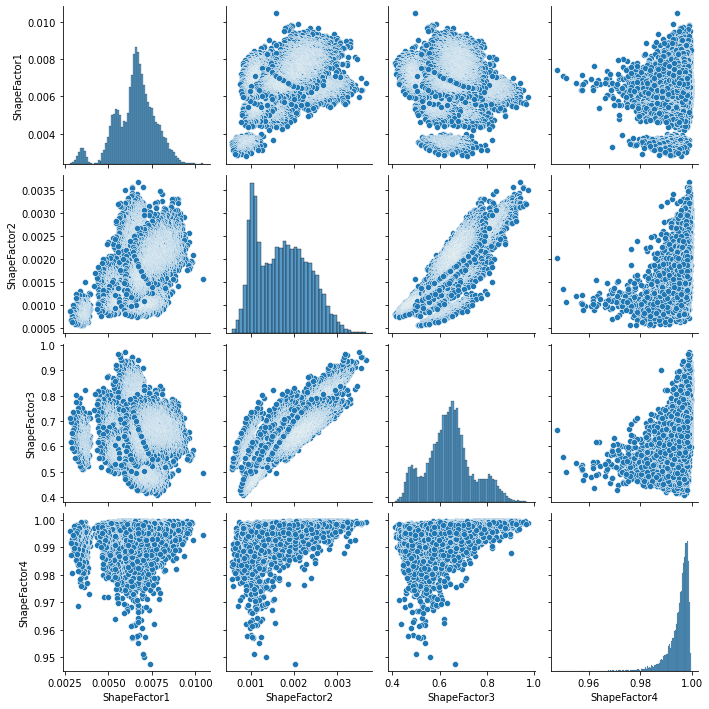

In [31]:
sns.pairplot(df[['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']])

Interessante notar como as variáveis de formato (ShapeFactor 1, 2, 3 e 4) não tem comportamentos muito parecidos entre si. Isso é interessante.


Vamos analisar agora as correlações entre as variáveis:

In [32]:
cor = df.drop('Class', axis=1).corr()
cor

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


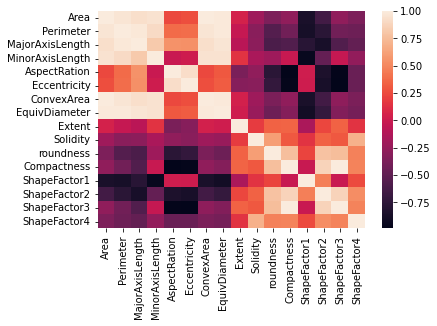

In [33]:
sns.heatmap(cor)

Agora vamos avaliar por exemplo a variável Proporção (AspectRation):

Ela tem uma alta correlação com as variáveis Eccentrencity, roundness, compactness, ShapeFactor2 e ShapeFactor3. Isso significa que, no caso de Eccentrencity, que a correlação é positiva, quanto mais aumentarmos a proporção do grão, maior será sua excentricidade.

O inverso é válido para as outras variáveis, que tem uma alta correlação negativa: conforme a proporção aumenta, seu arredondamento, compactness, formato do grão 2 e 3 diminuem. Importante ressaltar que isso não implica numa relação de causa e consequência, ou seja, o fato da proporção aumentar não quer dizer que isso cause a diminuição dos outros fatores. Eles diminuem por terem uma correlação negativa entre si, mas não por uma relação de causa e consequencia.

In [34]:
kmeans = KMeans(n_clusters = 7) 
pred_y = kmeans.fit_predict(df.drop('Class', axis=1))
df['clusters'] = pred_y

Colocada a nova cliassficação como uma coluna a mais no dataset, podemos agora comparar com as classificações originais:

In [35]:
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,clusters
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0


Vamos observar os resultados com a variável Area no eixo y:

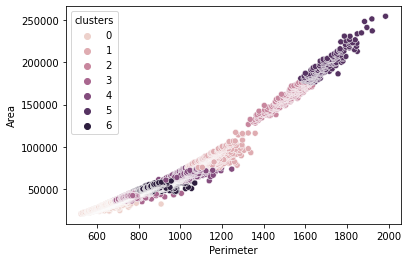

In [36]:
sns.scatterplot(data=df, x="Perimeter", y="Area", hue='clusters')

Parece haver uma divisão não muito nítida, mas existente: assim, grãos classificados como 5 oscilam entre ~65000 a ~115000 em Area e entre ~1100 e ~1400 no Perimeter.

O cluster 4 tá bem segmentado, os maiores valores de Area e de Perimeter foram classificados assim.

Vamos analisar mais duas variáveis:

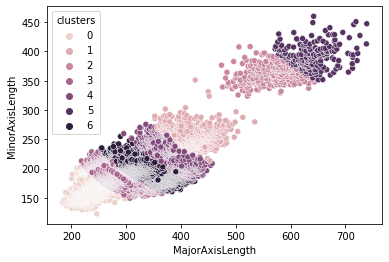

In [37]:
sns.scatterplot(data=df, x="MajorAxisLength", y="MinorAxisLength", hue='clusters')

Nesse gráfico conseguimos ver com muita clareza a diferença dos clusters. O Cluster 0, por exemplo, tem a variável x entre ~200 e ~400 e sua variável y entre ~150 e ~250. Isso significa que para o modelo qualquer grão com o comprimento do eixo maior e menor, respectivamente, entre esses intervalos tem grande chance de ser desse grupo. Não tem 100%, porque os intervalos se intersectam.

Em compensação, se o comprimento maior do grão for superior a ~650 e o comprimento menor for superior a ~400, o grupo, ou seja, a classe do feijão é a 5.

Interessante. Vejamos outros gráficos.

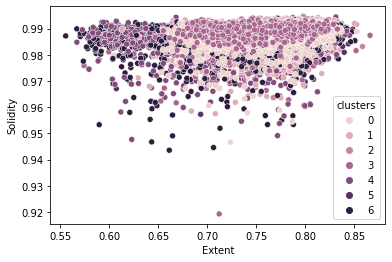

In [38]:
sns.scatterplot(data=df, x="Extent", y="Solidity", hue='clusters')

Esse exemplo, com essas variáveis, em compensação, não nos dizem muita coisa. Na verdade, a dispersão dos clusters não é clara e isso significa que os grãos, das 7 classes, a grosso modo, tem o valor da variável solidity na média superior a ~0.96 e podem assumir qualquer valor para a variável Extend.

Ou seja, não há uma classe específica que tenha um valor para solidez do grão ou sua extensão: todas as classes podem assumir uma gama maior de valores que não os diferencia uns dos outros, pelo menos visualmente.

Mais algumas análises.

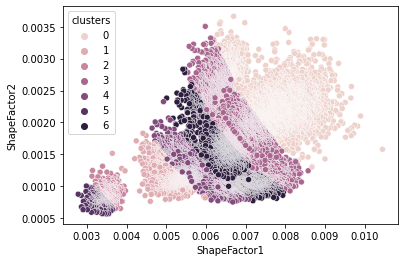

In [39]:
sns.scatterplot(data=df, x="ShapeFactor1", y="ShapeFactor2", hue='clusters')

Esse gráfico também mostra muito claro que o formato 1 e 2 do grão difere de grupo para grupo.

Os grãos classificados como 3, por exemplo, são os que assumem maior valor médio para o formato do grão 1 e 2. Os que tem os menores valores são os grãos classificados como 4. No meio do gráfico estão disperso os outros clusters em intervalos be definidos.

Esse gráfico é bem bacana e conclusivo para como o formato 1 e 2 dos grãos influenciou na decisão de agrupamento do algoritmo.

Vamos agora comparar com as classes reais e ver se a divisão foi perto da correta ou se o algoritmo agrupou de outra maneira os grãos:

Vamos começar plotando o mesmo gráfico acima, mas agora separando os dados pelas classes originais:

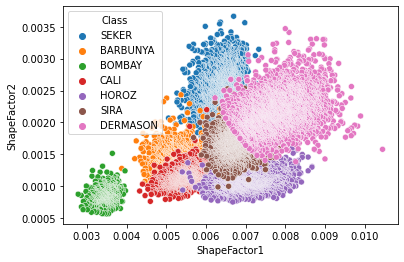

In [40]:
sns.scatterplot(data=df, x="ShapeFactor1", y="ShapeFactor2", hue='Class')

Já de cara podemos ver que a classe verde, Bombay, é a que apresenta os menores valores para os formatos do grão. Nosso algoritmo, em compensação, dividiu essa classe em dois clusters (o conjunto de dados verde, no gráfico acima, apresenta duas cores diferentes).

Da mesma maneira, os dados no intervalo do eixo x de ~0.004 a ~0.006 apresentam duas classes: os grãos Cali e Barbunya, enquanto que nossa clusterização classificou majoritariamente como 1 grão apenas.

Os grãos rosas no gráfico, da classe Dermason, possuem os maiores valores para as variáveis ShapeFormat1 e 2, assim como nosso cluster 3. 

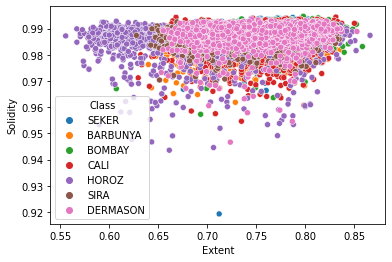

In [41]:
sns.scatterplot(data=df, x="Extent", y="Solidity", hue='Class')

Ao observarmos o gráfico de dispersão da variável Extent x Solidity, diferenciando as classes por cores, podemos ver que, assim como nossa modelagem, os valores são meio misturados e podem assumir grandes intervalos.

Diferentemente de nosso modelo, entretanto, a classe Horoz está bem distinta nesse gráfico: grãos dessa classe assumem valores para Extent menores que ~0.65 e para Solidity maiores que ~0.97, assim como as outras classes, na média.

Vamos ver de fato quanto nosso algoritmo acertou:

In [42]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Acima temos quantos grãos de cada classe temos no dataset. 

Vamos ver como nosso modelo se interage com isso:

In [43]:
df['clusters'].value_counts()

3    4191
0    3179
6    2607
4    1917
1    1197
2     303
5     217
Name: clusters, dtype: int64

Já podemos ver que o modelo tem umas divergências com a classe real: a ver, por exemplo, que a classe com mais exemplares, Dermason, tem 3546 grãos enquanto que para o algoritmo a classe com mais amostras foi o cluster 0, com 4296. Isso pode significar que o modelo assumiu que mais grãos eram Dermason, mas pode muito bem ter agrupado outras classes ainda. Dessa forma, vamos comparar as classes e NA TEORIA (mais abaixo vamos observar porquê essa hipótese foi equivocada) os clusters que as representam:

- Dermason (3546) x 0 (4296)
- Sira (2636) x 3 (3416)
- Seker (2027) x 5 (2453)
- Horoz (1928) x 2 (1900)
- Cali (1630) x 4 (1026)
- Barbunya (1322) x 1 (303)
- Bombay (522) x 6 (217)

Assumindo que cada cluster representa, de fato, cada classe, a porcentagem de acerto para cada classe foi de:

- Dermason: 21.15% de erro
- Sira: 29.59% de erro
- Seker: 21.02% de erro
- Horoz: 1.45% de erro
- Cali: 37.05% de erro
- Barbunya: 77.10% de erro
- Bombay: 58.43% de erro

Assumindo a premissa de que cada cluster representa de fato cada classe e que, dos valores que o algoritmou classificou para cada classe estão certos*, a classe que o algoritmo teve mais facilidade de segmentar foi a Horoz, acertando praticamente todos grãos (errando apenas em 28 unidades) e a que apresentou mais dificuldade de classificação foi a classe Barbunya, com uma diferença de 1019 grãos que não foram taxados como Barbunya e sim como outra classe.

Vamos ver de maneira mais detalhada:

*Na classe Bombay, por exemplo, o algoritmo achou 217 grãos e os classificou com Bombay. Entretanto, nada garante que esses grãos fossem de fato Bombay.


In [44]:
df[['Class', 'clusters']].value_counts()

Class     clusters
DERMASON  0           2697
SIRA      3           1640
SEKER     3           1423
HOROZ     6           1234
SIRA      6            943
DERMASON  3            849
CALI      1            802
          4            776
BARBUNYA  4            734
SEKER     0            411
HOROZ     4            404
BARBUNYA  1            390
BOMBAY    2            303
HOROZ     3            267
BOMBAY    5            217
SEKER     6            192
BARBUNYA  6            188
SIRA      0             51
CALI      6             50
HOROZ     0             20
BARBUNYA  3             10
HOROZ     1              3
CALI      3              2
BOMBAY    1              2
SIRA      4              2
SEKER     4              1
dtype: int64

Comparando todas as classificações com seus clusters, podemos assumir que:
- Dermason: cluster 3
- Sira ou Seker: cluster 0
- Horoz: cluster 5
- Cali ou Barbunya: cluster 2

Não é nem precismo continuar. Isso invalida a análise acima e prova justamente que os clusters não acertaram 100% da classificação. Por exemplo, clusters = 0 não representam apenas um tipo de grão. 

Vamos comparar graficamente:

Text(0.5, 1.0, 'Distribuição dos clusters')

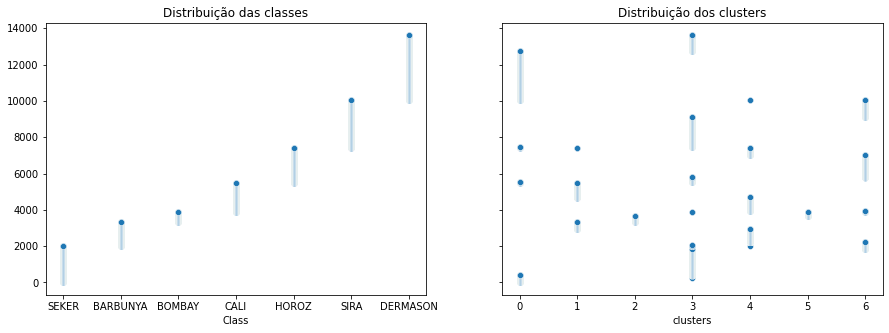

In [45]:
from seaborn.palettes import color_palette
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.scatterplot(data=df, ax=axes[0], x='Class', y=df.Class.index)
axes[0].set_title('Distribuição das classes')

sns.scatterplot(data=df, ax=axes[1], x='clusters', y=df.clusters.index)
axes[1].set_title('Distribuição dos clusters')


Agora sim fica claro a diferença. A classe Seker tem os grãos de índice 0 a ~2000 apenas, mas para o algoritmo foram vários intervalos. O mesmo se repete para os outros clusters e classes. A classe Dermason, por exemplo, foi de longe uma cheia de erros. A ver porquê grãos Dermason tem índice superior a ~10000 e vários exemplares, enquanto que o modelo classificou essa classe como grãos com índice entre ~4000 e ~5000, além de ter muito menos exemplares. Aqui devemos comparar a classe Seker com o cluster 0, a Barbunya com cluster 1 e assim sucessivamente.

Ao vemos que a dispersão para cada classe e cluster não é minimamente parecida podemos ver que o modelo não performou bem. Até mesmo a classe Horoz, que acima, considerando várias premissas (que se mostraram mais pra frente irreais), não foi assertiva: por mais que a somatória do número de grãos da classe Horoz e do cluster 4 fosse muito próxima, na verdade o que o modelo classificou como 4 não era exclusivamente dessa classe, mas sim de outras.

Para concluir, o modelo não performou bem, mas foi possível dissecar os dados e chegar a uma conclusão lógica de que, provavelmente, o Kmeans não seja a melhor opção para esses dados.